# Integration

Caution: Please install sympy before running this notebook

Installing `sympy` can be done using `pip install sympy`

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sympy import diff, Symbol, lambdify, sqrt
x = Symbol('x')

In [29]:
def circ(x):
    '''Function will return y where x^2 + y^2 = 1 in the first quadrant'''
    return sqrt(1 - x**2)

## Task 1

In [30]:
def simp_grid_1d(func, a, b, h = 0.01):
    '''Returns the integral of function from a to b using simple grid method'''
    N = int((b - a) / h)
    xvals = np.linspace(a, b, N + 1)
    intg = 0
    for i in range(N):
        intg += (func(xvals[i]) + func(xvals[i + 1]))
    return intg * h / 2

## Task 2

In [79]:
def adj_grid_1d(func, a, b, minx = 0.001):
    '''Returns the integral of function from a to b using adjusting grid method'''
    intg = 0
    x0 = a
    x1 = a
    y = func(x)
    dx = diff(y, x)
    dfx = lambdify(x, dx, 'numpy')
    while x0 < b:
        x1 += (0.01 / (abs(dfx(x0)) + 1) + minx)
        if x1 < b:
            intg += (func(x0) + func(x1)) * (x1 - x0) / 2
        x0 = x1
    return intg

## Task 3

In [32]:
def simp_mc(func, a, b, N = 1000):
    '''Returns the integral of function from a to b using simple Monte Carlo method'''
    N = int(N)
    max_val = max([circ(x) for x in np.linspace(a,b, (b - a) * 1000 + 1)])
    yvals = np.array([random.random() for i in range(N)]) * max_val
    xvals = np.array([random.random() for i in range(N)]) * (b - a) + a
    intg = 0
    for i in range(N):
        if yvals[i] - func(xvals[i]) <= 0:
            intg += 1
    return intg * (b - a) * max_val / N

## Task 4

### Task 4.1

In [33]:
def uni_mc(func, a, b, N = 1000):
    '''Returns the integral of function from a to b using Monte Carlo method
    with uniform probabitlity distribution function'''
    N = int(N)
    # print(N)
    xvals = np.array([random.random() for i in range(N)]) * (b - a) + a
    intg = 0
    for xv in xvals:
        intg += func(xv)
    return (b - a) * intg / N


### Task 4.2

In [34]:
def gaus(x, mu, sigma):
    '''Returns gaussian pdf(x)'''
    return math.exp(-((x - mu)/sigma)**2 / 2)/ (sigma * math.sqrt(2* np.pi))

In [50]:
def gaus_mc(func, a, b, N = 1000, mu=0, sigma=1):
    '''Returns the integral of function from a to b using Monte Carlo method
    with gaussian probabitlity distribution function'''
    N = int(N)
    xvals = np.random.normal(mu, sigma, N)
    intg = 0
    for xv in xvals:
        if xv >= a and xv <= b:
            intg += func(xv) / gaus(xv, mu, sigma)
    return intg / N

    
    

## Task 5

In [82]:
simp_grid_1d(circ, 0, 1)*4

3.14041703177905

In [81]:
adj_grid_1d(circ, 0, 1)*4

3.14143379965194

In [83]:
simp_mc(circ, 0, 1)*4

3.17200000000000

In [85]:
uni_mc(circ, 0, 1)*4

3.15901188307315

In [87]:
gaus_mc(circ, 0, 1)*4

3.24715364623462

In [67]:
# this is taking about 50 - 60 seconds
n_mc1 = np.array([simp_mc(circ, 0, 1, w) for w in np.linspace(1000, 10000, 10)])*4
u_mc1 = np.array([uni_mc(circ, 0, 1, w) for w in np.linspace(1000, 10000, 10)])*4
g_mc1 = np.array([gaus_mc(circ, 0, 1, w) for w in np.linspace(1000, 10000, 10)])*4

Text(0.5, 1.0, 'Computed area vs N belong to [1000, 10000]')

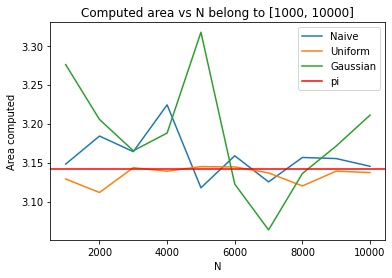

In [68]:

plt.plot(np.linspace(1000, 10000, 10), n_mc1, label="Naive")
plt.plot(np.linspace(1000, 10000, 10), u_mc1, label="Uniform")
plt.plot(np.linspace(1000, 10000, 10), g_mc1, label="Gaussian")
plt.axhline(y=np.pi, color="r", label="pi")
plt.xlabel("N")
plt.ylabel("Area computed")
plt.legend()
plt.title("Computed area vs N belong to [1000, 10000]")

Text(0.5, 1.0, 'Error vs N belong to [1000, 10000]')

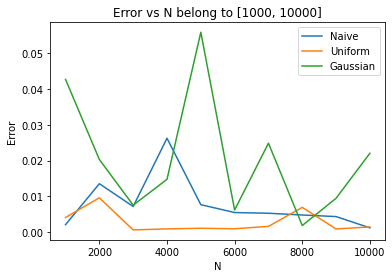

In [69]:
n_err1 = abs((np.array(n_mc1) / (np.pi)) - 1)
u_err1 = abs((np.array(u_mc1) / (np.pi)) - 1)
g_err1 = abs((np.array(g_mc1) / (np.pi)) - 1)

plt.plot(np.linspace(1000, 10000, 10), n_err1, label="Naive")
plt.plot(np.linspace(1000, 10000, 10), u_err1, label="Uniform")
plt.plot(np.linspace(1000, 10000, 10), g_err1, label="Gaussian")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.title("Error vs N belong to [1000, 10000]")

In [70]:
n_mc2 = np.array([simp_mc(circ, 0, 1, w) for w in np.linspace(100, 1000, 10)]) * 4
u_mc2 = np.array([uni_mc(circ, 0, 1, w) for w in np.linspace(100, 1000, 10)]) * 4
g_mc2 = np.array([gaus_mc(circ, 0, 1, w) for w in np.linspace(100, 1000, 10)]) * 4

Text(0.5, 1.0, 'Computed area vs N belong to [100, 1000]')

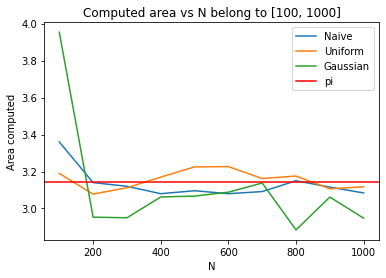

In [71]:
plt.plot(np.linspace(100, 1000, 10), n_mc2, label="Naive")
plt.plot(np.linspace(100, 1000, 10), u_mc2, label="Uniform")
plt.plot(np.linspace(100, 1000, 10), g_mc2, label="Gaussian")
plt.axhline(y=np.pi, color="r", label="pi")
plt.xlabel("N")
plt.ylabel("Area computed")
plt.legend()
plt.title("Computed area vs N belong to [100, 1000]")

Text(0.5, 1.0, 'Error vs N belong to [100, 1000]')

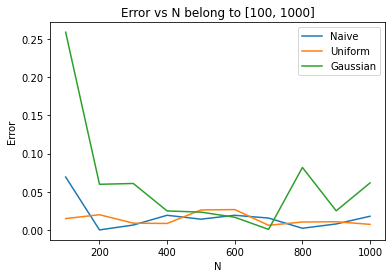

In [72]:
n_err2 = abs((np.array(n_mc2) / (np.pi)) - 1)
u_err2 = abs((np.array(u_mc2) / (np.pi)) - 1)
g_err2 = abs((np.array(g_mc2) / (np.pi)) - 1)

plt.plot(np.linspace(100, 1000, 10), n_err2, label="Naive")
plt.plot(np.linspace(100, 1000, 10), u_err2, label="Uniform")
plt.plot(np.linspace(100, 1000, 10), g_err2, label="Gaussian")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.title("Error vs N belong to [100, 1000]")

In [74]:
n_mc3 = np.array([simp_mc(circ, 0, 1, w) for w in np.linspace(10, 1000, 100)])*4
u_mc3 = np.array([uni_mc(circ, 0, 1, w) for w in np.linspace(10, 1000, 100)])*4
g_mc3 = np.array([gaus_mc(circ, 0, 1, w) for w in np.linspace(10, 1000, 100)])*4

Text(0.5, 1.0, 'Computed area vs N belong to [10, 1000]')

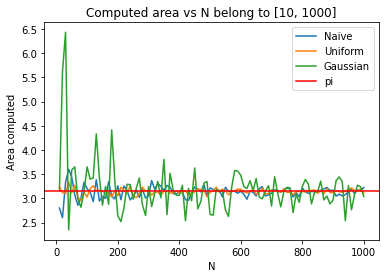

In [75]:
plt.plot(np.linspace(10, 1000, 100), n_mc3, label="Naive")
plt.plot(np.linspace(10, 1000, 100), u_mc3, label="Uniform")
plt.plot(np.linspace(10, 1000, 100), g_mc3, label="Gaussian")
plt.axhline(y=np.pi, color="r", label="pi")
plt.xlabel("N")
plt.ylabel("Area computed")
plt.legend()
plt.title("Computed area vs N belong to [10, 1000]")

Text(0.5, 1.0, 'Error vs N belong to [10, 1000]')

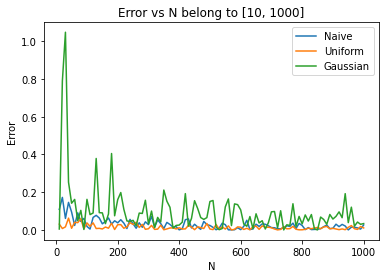

In [76]:
n_err3 = abs((np.array(n_mc3) / (np.pi)) - 1)
u_err3 = abs((np.array(u_mc3) / (np.pi)) - 1)
g_err3 = abs((np.array(g_mc3) / (np.pi)) - 1)

plt.plot(np.linspace(10, 1000, 100), n_err3, label="Naive")
plt.plot(np.linspace(10, 1000, 100), u_err3, label="Uniform")
plt.plot(np.linspace(10, 1000, 100), g_err3, label="Gaussian")
plt.xlabel("N")
plt.ylabel("Error")
plt.legend()
plt.title("Error vs N belong to [10, 1000]")